In [1]:
# GET PARAMETERS
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt 
import torch 
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.load_best_config import get_trainer_and_ds_from_saved_trial
from constants.paths import SAVE_DIRECTORY
from plotting.plotting import get_gain_from_mod1,get_y_size_from_temporal_agg,plot_coverage_matshow,get_df_mase_and_gains,gain_between_models

def get_previous_and_prediction(trainer1,trainer2,ds1,ds2,training_mode):
    full_predict1,Y_true,_ = trainer1.testing(ds1.normalizer, training_mode =training_mode)
    full_predict2,_,_ = trainer2.testing(ds2.normalizer, training_mode =training_mode)

    inputs = [[x,y,x_c] for  x,y,x_c in ds1.dataloader[training_mode]]
    X = torch.cat([x for x,_,_ in inputs],0)
    X = ds1.normalizer.unormalize_tensor(inputs = X,feature_vect = True) # unormalize input cause prediction is unormalized 

    previous = X[:,:,-1]
    predict1 = full_predict1[:,:,0]
    predict2 = full_predict2[:,:,0]
    real = Y_true[:,:,0]
    return previous,predict1,predict2,real

def plot_gain_between_models_with_temporal_agg(ds,dic_error,stations,temporal_aggs,training_mode):
    fig, axes = plt.subplots(len(temporal_aggs), 2, figsize=(max(8,0.5*len(stations)),6*len(temporal_aggs)),gridspec_kw={'width_ratios': [1,5],'height_ratios': [4,3,2]})
    for i,temporal_agg in enumerate(temporal_aggs):
        df_mase1,df_mase2,df_gain21 = get_df_mase_and_gains(ds,dic_error,training_mode,temporal_agg,stations)
        # agg All sations  
        plt.sca(axes[i,0])
        plot_coverage_matshow(pd.DataFrame(pd.DataFrame(df_gain21).mean(axis=1)),cmap = 'RdYlBu', save=None, 
                            cbar_label='MASE Gain (%)',bool_reversed=True,v_min=-10,v_max=10)
        title = f'Average MASE Gain(%) per {temporal_agg} of \nModel2 compared to Model1\nAggregated through stations'
        axes[i,0].set_title(title)

        # Per station 
        plt.sca(axes[i,1])
        plot_coverage_matshow(pd.DataFrame(df_gain21),cmap = 'RdYlBu', save=None, 
                            cbar_label='MASE Gain (%)',bool_reversed=True,v_min=-20,v_max=20)
        title = f'Average MASE Gain(%) per {temporal_agg} of \nModel2 compared to Model1'
        axes[i,1].set_title(title) 

Training and Hyper-parameter tuning with Ray is not possible


In [ ]:
modification = {'shuffle':False,
                'data_augmentation':False
                'freq':'15min'}

# Load Model1:
save_folder1 = 'K_fold_validation/training_with_HP_tuning/re_validation'
add_name_id1 = ''
trial_id1 ='subway_in_STGCN_MSELoss_2025_01_20_14_27_20569'
trainer1,ds1,args1 = get_trainer_and_ds_from_saved_trial(trial_id1,add_name_id1,save_folder1,modification)

# Fine Tune Model1: 


# Get Pred1,Pred2, TrueValues:
training_mode = 'test'
min_flow = 20

previous,predict1,predict2,real = get_previous_and_prediction(trainer1,trainer2,ds1,ds2,training_mode)
dic_gain,dic_error = get_gain_from_mod1(real,predict1,predict2,previous,min_flow,metrics = ['mse','mae','mape'],acceptable_error= 0,mape_acceptable_error=0)

temporal_aggs = ['hour','date','weekday']
stations = list(ds1.spatial_unit)  # ['BEL','PER','PAR','AMP','FOC'] #list(ds1.spatial_unit)


plot_gain_between_models_with_temporal_agg(ds1,dic_error,stations,temporal_aggs,training_mode)

# Load Both models to compare : 

In [2]:
modification = {'shuffle':False,
                'data_augmentation':False
                'freq':'15min'}

# Load Model1:
save_folder1 = 'K_fold_validation/training_with_HP_tuning/re_validation'
add_name_id1 = ''
trial_id1 ='subway_in_STGCN_MSELoss_2025_01_20_14_27_20569'
trainer1,ds1,args1 = get_trainer_and_ds_from_saved_trial(trial_id1,add_name_id1,save_folder1,modification)

# Load Model2: 
#Trained Model with Subway-in / Subway-out 
if False:
    save_folder2 = 'K_fold_validation/training_with_HP_tuning/re_validation'
    add_name_id2 = 'concat_early'
    trial_id2 ='subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_20_05_38_87836' 
    trainer2,ds2,args2 = get_trainer_and_ds_from_saved_trial(trial_id2,add_name_id2,save_folder2,modification)

#Trained Model with Subway-in / NetMob POI:
if False: 
    save_folder2 = 'K_fold_validation/training_with_HP_tuning/re_validation'
    #add_name_id2 = 'NETMOB_POIS_maps_Twitter_concat_early_late_UL_DL_all_tags'
    add_name_id2 = 'NETMOB_POIS_maps_Deezer_concat_early_DL_IRIS'
    trial_id2 ='subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_20_05_38_87836' 
    trainer2,ds2,args2 = get_trainer_and_ds_from_saved_trial(trial_id2,add_name_id2,save_folder2,modification)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 


Invalid dates within this fold: 776

Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
Init U/Utarget size: torch.Size([4702, 40, 7])/torch.Size([4702, 40, 1]) Train/Valid/Test 2821 940 940

 ===== ERROR WITH prefetch_factor====  
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing
Invalid dates within this fold: 481

Init Dataset: 'torch.Size([4597, 40]) with 183880 Total nb of elements and 0 Nan values
Init U/Utarget size: torch.Size([2940, 40, 7])/torch.Size([2940, 40, 1]) Train/Valid/Test 1059 941 939

 ===== ERROR WITH prefetch_factor====  
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing
Model size: 0.000GB
number of total parameters: 71713
number of trainable parameters: 71713


## Have a look on some interpolation:

In [3]:
# 'DA_method': 'magnitude_warping'
# 'DA_method': 'rich_interpolation'
# 'DA_method': 'interpolation'

modification = {'shuffle':False,
                'DA_method' : ['magnitude_warping','rich_interpolation'],
                'data_augmentation' : True 
                }


save_folder2 = 'K_fold_validation/training_with_HP_tuning/re_validation'
add_name_id2 = 'concat_early'
trial_id2 ='subway_in_subway_out_STGCN_VariableSelectionNetwork_MSELoss_2025_01_20_05_38_87836' 
trainer2,ds2,args2 = get_trainer_and_ds_from_saved_trial(trial_id2,add_name_id2,save_folder2,modification)

training_mode = 'train'
inputs = [[x,y,x_c] for  x,y,x_c in ds2.dataloader[training_mode]]
nb_contextual_data = len(inputs[0][2])
X = torch.cat([x for x,_,_ in inputs],0).to(trainer2.args.device)
Y_true = torch.cat([y for _,y,_ in inputs],0).to(trainer2.args.device)
X_c = [torch.cat([x_c[k] for _,_,x_c in inputs],0).to(trainer2.args.device)  for k in range(nb_contextual_data)]
X_c_one = [torch.ones(x_c.size()).to(trainer2.args.device) for x_c in X_c]

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Invalid dates within this fold: 776



Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
vision_input_type POIs
vision_model_name VariableSelectionNetwork
2821 train samples had been added thank to Data Augmentation
calendar_dayofweek data augmented by duplication but not modified
calendar_hour data augmented by duplication but not modified
calendar_dayofweek data augmented by duplication but not modified
calendar_hour data augmented by duplication but not modified
calendar_dayofweek data augmented by duplication but not modified
calendar_hour data augmented by duplication but not modified
calendar_dayofweek data augmented by duplication but not modified
calendar_hour data augmented by duplication but not modified
calendar_dayofweek data augmented by duplication but not modified
calendar_hour data augmented by duplication but not modified
calendar_dayofweek data augmented by duplication but not modified
calendar_hour data augmented by duplication but not modified
calendar_dayofweek dat

<Axes: >

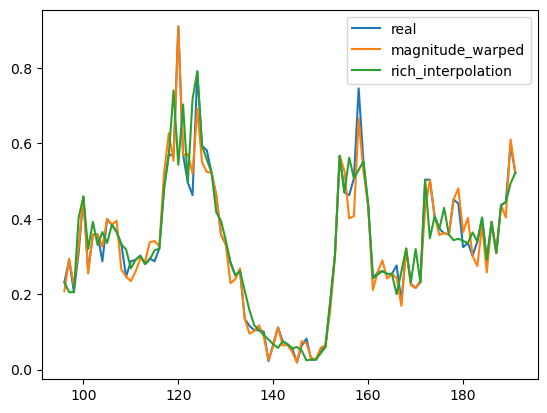

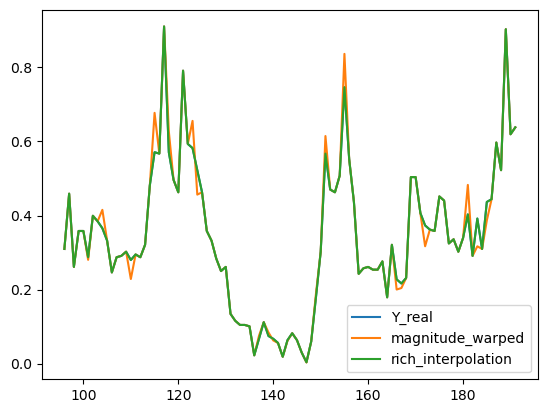

In [10]:
n = X.size(0)//3
station_i = 0

L = -3

pd.DataFrame({'real': X[:n,station_i,L].detach().cpu(),
              'magnitude_warped':X[n:2*n,station_i,L].detach().cpu(),
              'rich_interpolation':X[2*n:,station_i,L].detach().cpu(),
              }).iloc[96*1:96*2,:].plot()


pd.DataFrame({'Y_real': Y_true[:n,station_i,0].detach().cpu(),
              'magnitude_warped':Y_true[n:2*n,station_i,0].detach().cpu(),
               'rich_interpolation':Y_true[2*n:,station_i,0].detach().cpu(),
              }).iloc[96*1:96*2,:].plot()

## Get Metrics from trained model. Compared consistency with saved one : 
Nous permets de nous assurer qu'on à bien sauvegarder le meilleur model, et que c'est bien celui qu'on Load.

In [4]:
def display_consistency(trainer,ds,save_folder,trial_id,add_name_id,training_mode = 'test'):
    full_predict1,Y_true,_ = trainer.testing(ds.normalizer, training_mode =training_mode)
    Y_true= Y_true.detach().clone().reshape(-1)    
    full_predict1= full_predict1.detach().clone().reshape(-1)    
    error_pred1 = ((Y_true - full_predict1)**2).mean()

    df_metrics1 = pd.read_csv(f"{current_path}/{SAVE_DIRECTORY}/{save_folder}/METRICS_{trial_id}{add_name_id}.csv")
    display(df_metrics1)
    print(f"MSE errror on {training_mode} by loading trained model : {'{:.2f}'.format(error_pred1.item())}\n")

In [3]:
display_consistency(trainer1,ds1,save_folder1,trial_id1,add_name_id1,training_mode = 'test')
display_consistency(trainer2,ds2,save_folder2,trial_id2,add_name_id2,training_mode = 'test')

,Unnamed: 0,mse,mae,mape,VAR_mse,VAR_mae,VAR_mape,mse_complete_ds,mae_complete_ds,mape_complete_ds
0,valid,1250.633032,20.827599,34.545302,8210.072104,0.396348,11.819149,1157.247070,19.905209,30.030531
1,test,1306.318921,21.229312,33.583765,1632.788441,0.561886,37.853172,1319.264526,20.539398,28.160223


MSE errror on test by loading trained model : 1319.26



,Unnamed: 0,mse,mae,mape,VAR_mse,VAR_mae,VAR_mape,mse_complete_ds,mae_complete_ds,mape_complete_ds
0,valid,1230.919019,20.847181,36.719215,5382.383880,0.558646,6.967195,1128.664185,19.996849,33.227039
1,test,1288.185107,21.260062,36.229020,4998.188979,1.045187,84.935830,1286.441650,20.617752,29.995420


MSE errror on test by loading trained model : 1286.44



## Checking if Contetual Data are taken into account
- Set the Tensor associated to contextual data as 0 Tensor 
- Do the prediction 
- Compare the associated metrics

In [9]:
def check_impact_of_contextual_data(trainer,ds,training_mode = 'test'):
    inputs = [[x,y,x_c] for  x,y,x_c in ds.dataloader[training_mode]]
    nb_contextual_data = len(inputs[0][2])
    X = torch.cat([x for x,_,_ in inputs],0).to(trainer.args.device)
    Y_true = torch.cat([y for _,y,_ in inputs],0).to(trainer.args.device)
    X_c = [torch.cat([x_c[k] for _,_,x_c in inputs],0).to(trainer.args.device)  for k in range(nb_contextual_data)]
    X_c_one = [torch.ones(x_c.size()).to(trainer.args.device) for x_c in X_c]

    trainer.model.eval()
    with torch.no_grad():
        Preds = trainer.model(X,X_c)
        Preds_no_contextual = trainer.model(X,X_c_one)
        
    Preds = Preds.detach().cpu()
    Preds_no_contextual = Preds_no_contextual.detach().cpu()
    Y_true = Y_true.detach().cpu()
    Preds = ds.normalizer.unormalize_tensor(inputs = Preds,feature_vect = True).reshape(-1)     #  device = self.args.device
    Preds_no_contextual = ds.normalizer.unormalize_tensor(inputs = Preds_no_contextual,feature_vect = True).reshape(-1)     #  device = self.args.device
    Y_true = ds.normalizer.unormalize_tensor(inputs = Y_true,feature_vect = True).reshape(-1)     # device = self.args.device

    error_pred1 = ((Y_true - Preds)**2).mean()
    error_pred_contextual_null = ((Y_true - Preds_no_contextual)**2).mean()

    print(f"MSE errror on {training_mode} set by loading trained model :\nWith contectual data: {'{:.2f}'.format(error_pred1.item())}")
    print(f"Without contectual data: {'{:.2f}'.format(error_pred_contextual_null.item())}")
    print(f"Associated MSE Gain {'{:.1%}'.format(1-error_pred1.item()/error_pred_contextual_null.item())}")

check_impact_of_contextual_data(trainer2,ds2,training_mode = 'test')

MSE errror on test set by loading trained model :
With contectual data: 1286.44
Without contectual data: 2206.18
Associated MSE Gain 41.7%


## Production de Visuel :

In [4]:
# Get Pred1,Pred2, TrueValues:
training_mode = 'test'
min_flow = 20

previous,predict1,predict2,real = get_previous_and_prediction(trainer1,trainer2,ds1,ds2,training_mode)
dic_gain,dic_error = get_gain_from_mod1(real,predict1,predict2,previous,min_flow,metrics = ['mse','mae','mape'],acceptable_error= 0,mape_acceptable_error=0)

## Get Naiv Error and Model1 Error: 

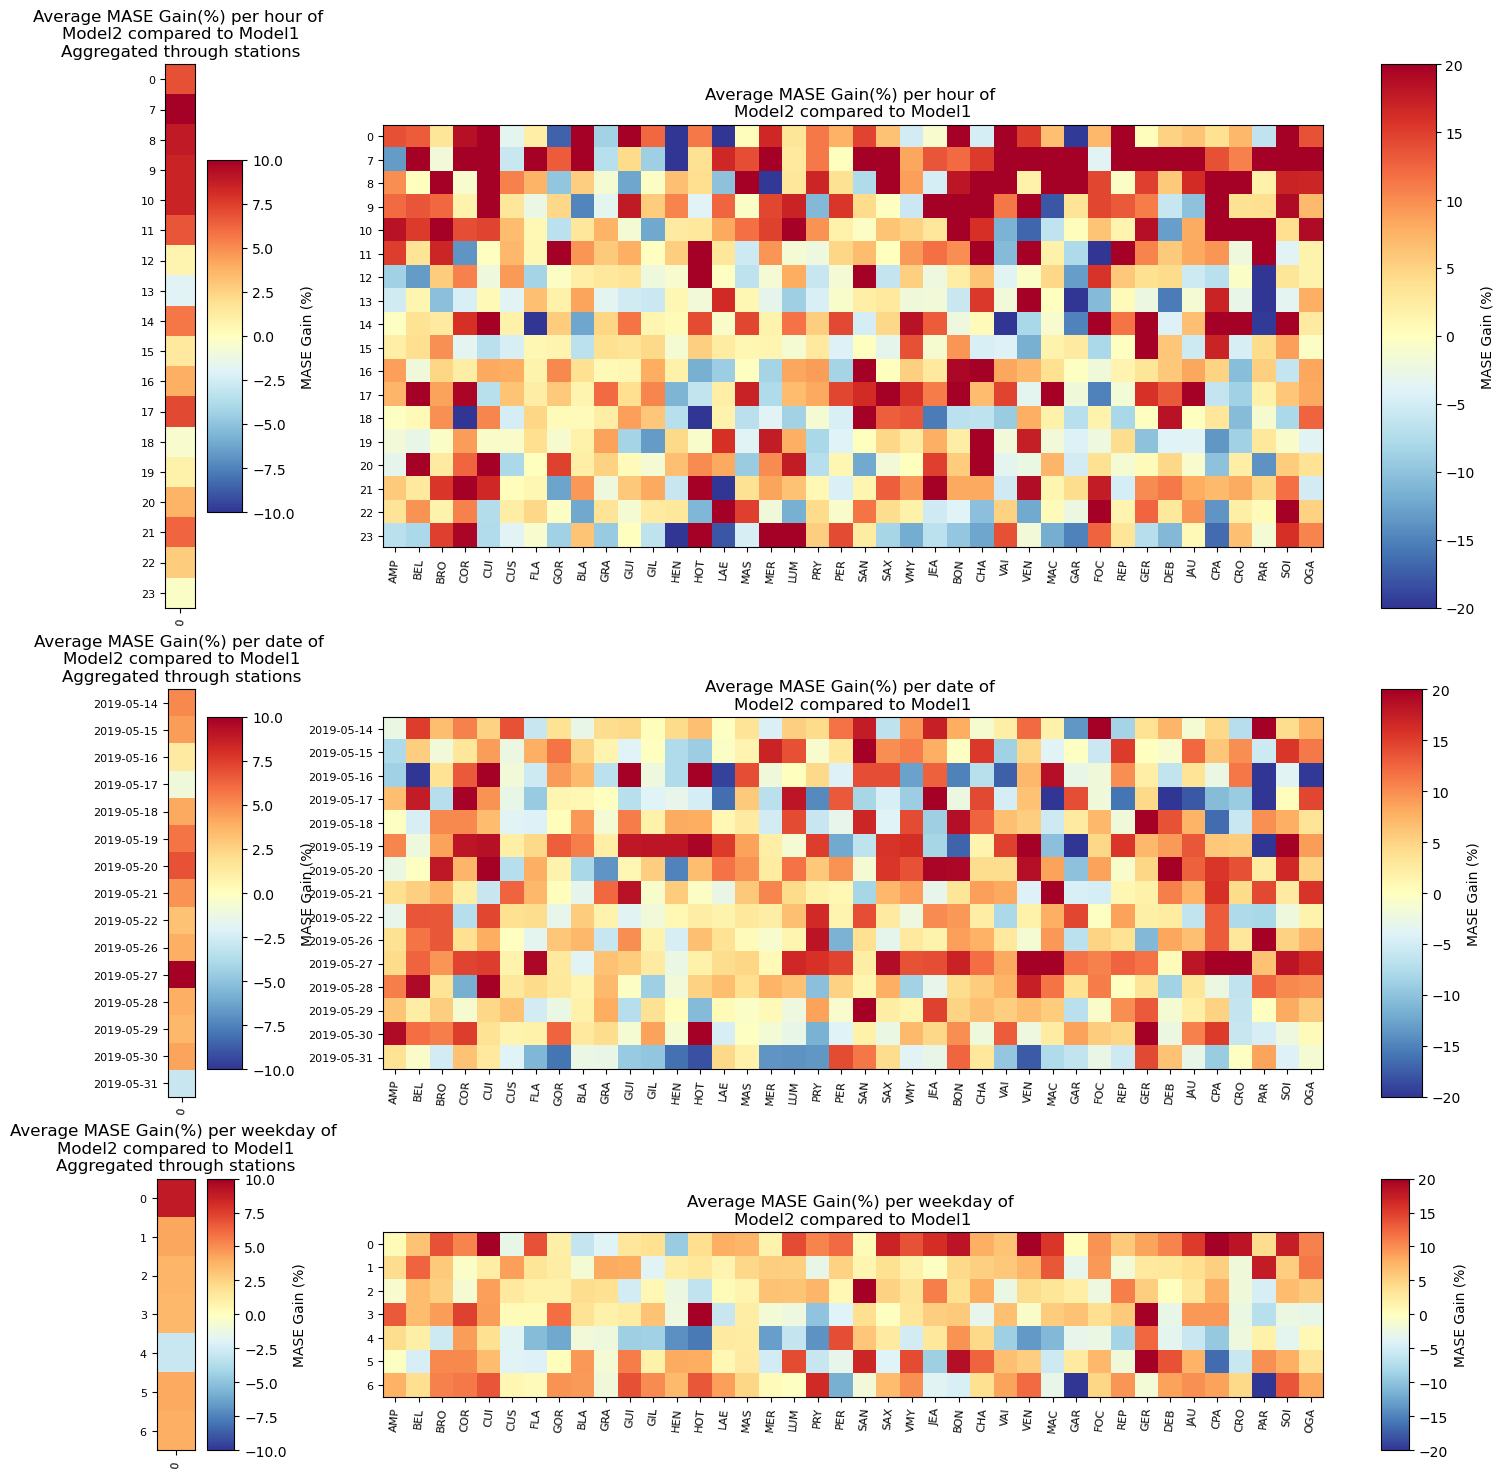

In [6]:
temporal_aggs = ['hour','date','weekday']
stations = list(ds1.spatial_unit)  # ['BEL','PER','PAR','AMP','FOC'] #list(ds1.spatial_unit)


plot_gain_between_models_with_temporal_agg(ds1,dic_error,stations,temporal_aggs,training_mode)

"""
fig, axes = plt.subplots(len(temporal_aggs), 2, figsize=(max(8,0.5*len(stations)),6*len(temporal_aggs)),gridspec_kw={'width_ratios': [1,5],'height_ratios': [4,3,2]})
for i,temporal_agg in enumerate(temporal_aggs):
    df_mase1,df_mase2,df_gain21 = get_df_mase_and_gains(ds1,dic_error,training_mode,temporal_agg,stations)
    # agg All sations  
    plt.sca(axes[i,0])
    plot_coverage_matshow(pd.DataFrame(pd.DataFrame(df_gain21).mean(axis=1)),cmap = 'RdYlBu', save=None, 
                        cbar_label='MASE Gain (%)',bool_reversed=True,v_min=-10,v_max=10)
    title = f'Average MASE Gain(%) per {temporal_agg} of \nModel2 compared to Model1\nAggregated through stations'
    axes[i,0].set_title(title)

    # Per station 
    plt.sca(axes[i,1])
    plot_coverage_matshow(pd.DataFrame(df_gain21),cmap = 'RdYlBu', save=None, 
                        cbar_label='MASE Gain (%)',bool_reversed=True,v_min=-20,v_max=20)
    title = f'Average MASE Gain(%) per {temporal_agg} of \nModel2 compared to Model1'
    axes[i,1].set_title(title) 
"""


## Plot Time Series on specific station: 

<Axes: >

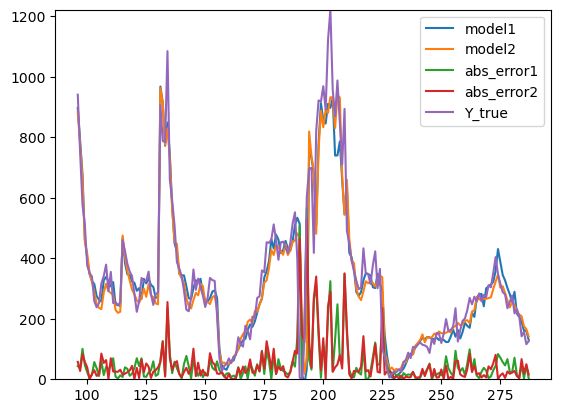

In [6]:
station = 'BEL'
start_day = 1
nb_days = 2


station_i = list(ds1.spatial_unit).index(station)
pred1 = predict1[:,station_i].numpy()
pred2 = predict2[:,station_i].numpy()
ytrue = real[:,station_i].numpy()

error_abs1 = dic_error['mae']['error_pred1'].reshape(-1,len(ds1.spatial_unit))[:,station_i]
error_abs2 = dic_error['mae']['error_pred2'].reshape(-1,len(ds1.spatial_unit))[:,station_i]
naive_error = dic_error['mae_naiv']['error_naiv'].reshape(-1,len(ds1.spatial_unit))[:,station_i]

ax = pd.DataFrame({'model1':pred1,
              'model2':pred2,
              'abs_error1':error_abs1,
              'abs_error2':error_abs2,
              'Y_true':ytrue 
              }).iloc[start_day*96:96*(start_day+nb_days)]
ax.plot(ylim = [0,ytrue[start_day*96:96*(start_day+nb_days)].max()])

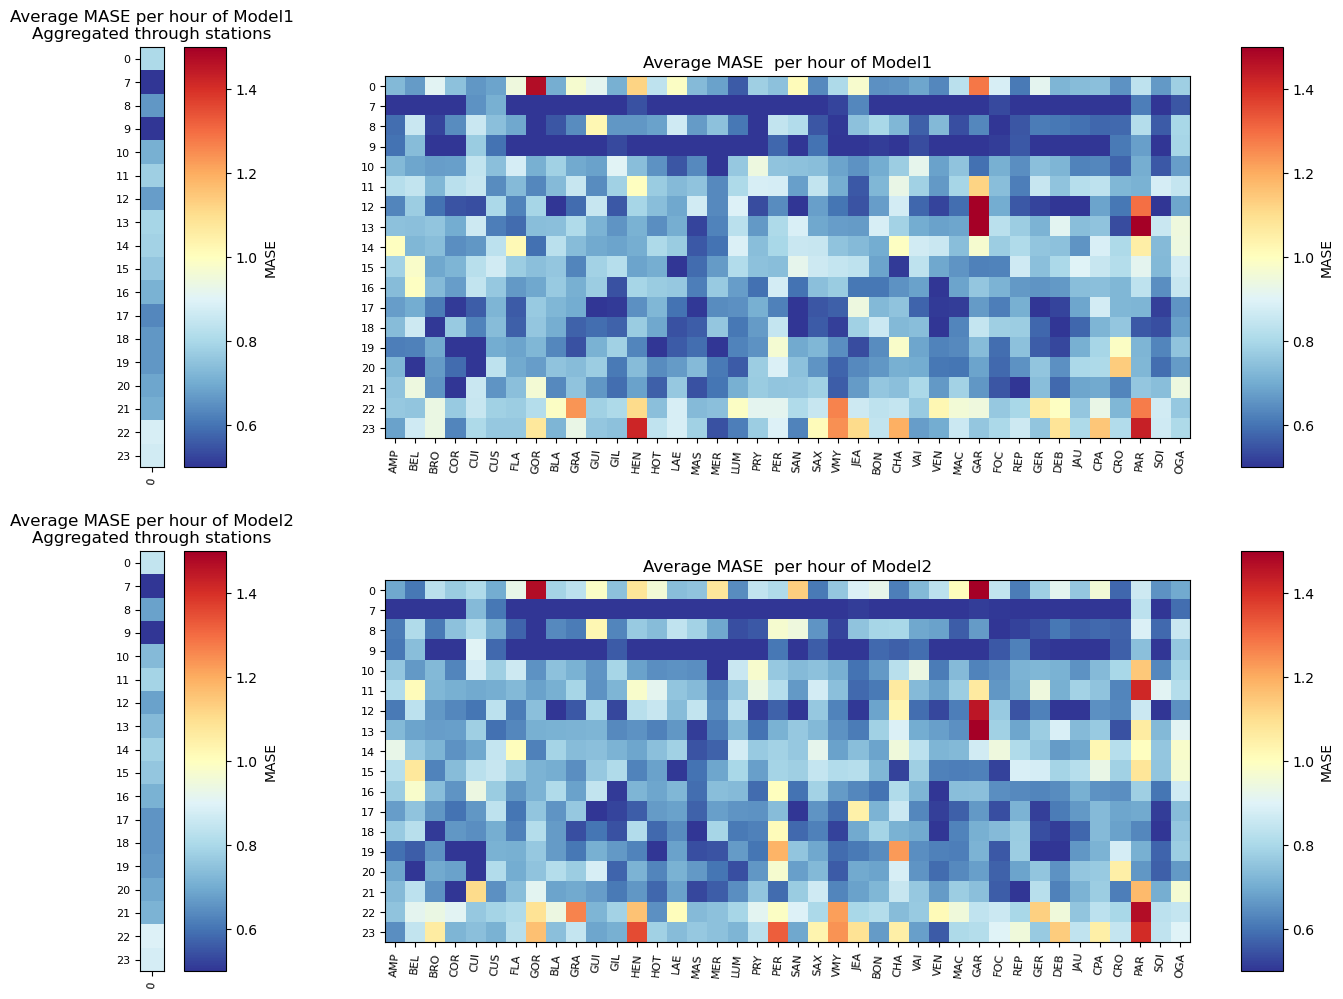

In [10]:
stations = list(ds1.spatial_unit)  # ['BEL','PER','PAR','AMP','FOC'] #list(ds1.spatial_unit)
temporal_aggs = ['hour'] #['weekday_hour_minute','weekday_hour','hour','date','weekday']
for temporal_agg in temporal_aggs:
    fig, axes = plt.subplots(2, 2, figsize=(max(8,0.5*len(stations)),get_y_size_from_temporal_agg(temporal_agg)),gridspec_kw={'width_ratios': [2,5]})
    df_mase1,df_mase2,df_gain21 = get_df_mase_and_gains(ds1,dic_error,training_mode,temporal_agg,stations)
    for i,df_mase in enumerate([df_mase1,df_mase2]):
        # agg All sations  
        plt.sca(axes[i,0])
        plot_coverage_matshow(pd.DataFrame(pd.DataFrame(df_mase).mean(axis=1)),cmap = 'RdYlBu', save=None, 
                            cbar_label='MASE',bool_reversed=True,v_min=0.5,v_max=1.5)
        title = f'Average MASE per {temporal_agg} of Model{i+1}\nAggregated through stations'
        axes[i,0].set_title(title)

        # Per station 
        plt.sca(axes[i,1])
        plot_coverage_matshow(pd.DataFrame(df_mase),cmap = 'RdYlBu', save=None, 
                            cbar_label='MASE',bool_reversed=True,v_min=0.5,v_max=1.5)
        title = f'Average MASE  per {temporal_agg} of Model{i+1}'
        axes[i,1].set_title(title) 


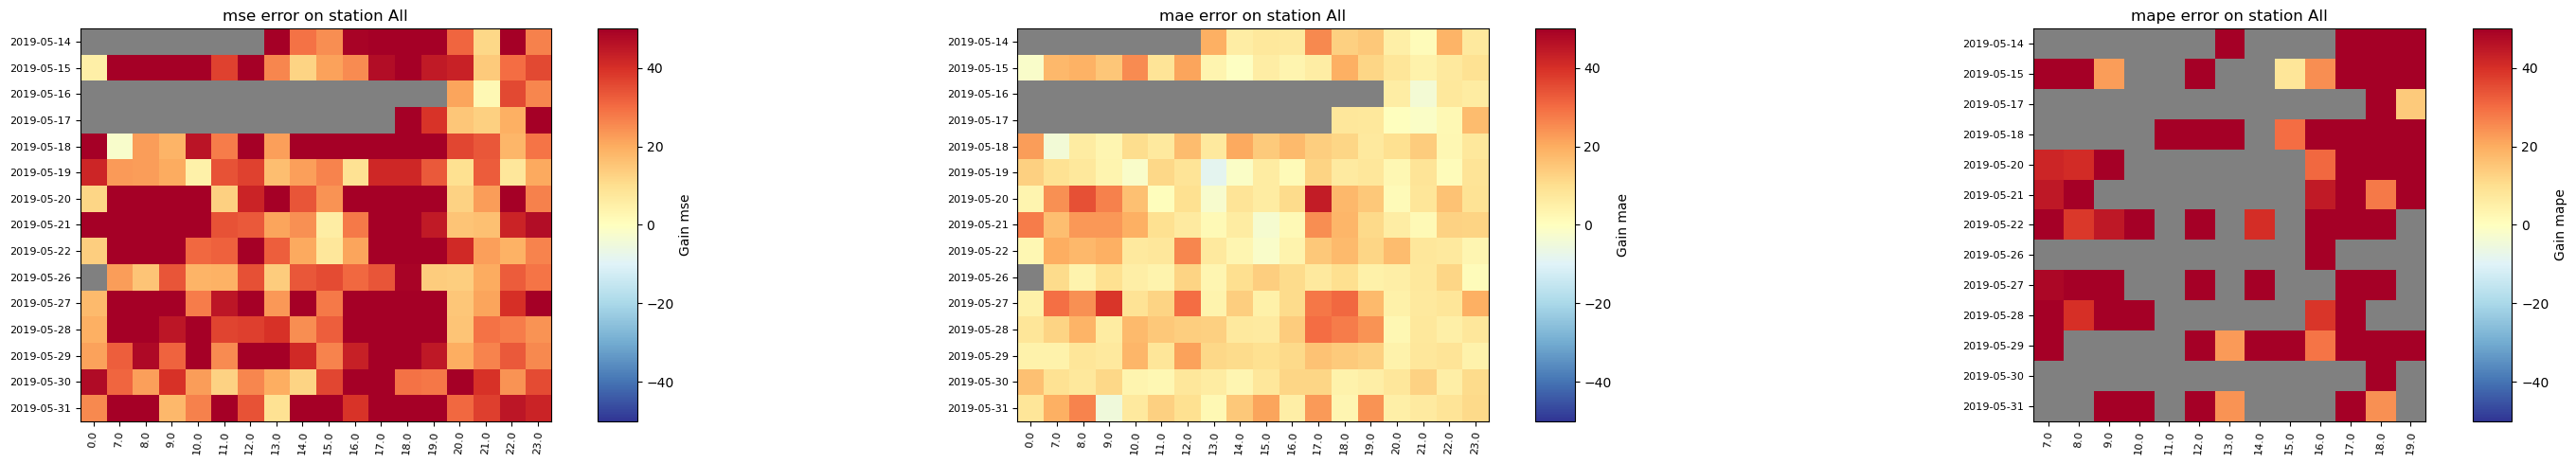

(<Figure size 3000x500 with 6 Axes>,
 array([<Axes: title={'center': 'mse error on station All'}>,
        <Axes: title={'center': 'mae error on station All'}>,
        <Axes: title={'center': 'mape error on station All'}>],
       dtype=object))

In [11]:
station = ['PAR','PER','GER','BON']
training_mode = 'test'

# index_matshow in :  ['weekday','hour','month_year','date','day_date']
# columns_matshow in :  [None, 'weekday','hour','month_year','date','day_date']

gain_between_models(trainer1,trainer2,ds1,ds2,training_mode,
                         metrics = ['mse','mae','mape'],
                        freq='1h',
                        index_matshow = 'date',
                        columns_matshow = 'hour',
                        min_flow = 20,
                        limit_percentage_error = 50,
                        acceptable_error = 10,
                        stations = station,
                        plot_each_station = False,
                        plot_all_station = True)

## Visualisation des coeff d'attentions :

In [ ]:
from plotting.plotting import plot_attn_weight
from constants.paths import CALENDAR_TYPE
nb_calendar_data = len(CALENDAR_TYPE)
temporal_agg = 'hour'  # weekday_hour_minutes','hour','weekday','weekday_hour'
plot_attn_weight(trainer2,nb_calendar_data,ds1,training_mode = training_mode,stations= station,temporal_agg =temporal_agg,save=None)

## Fine Tuning on Specific Moments : 
- !!! ICI besoin de 'shuffle = True' parce qu'on train le model (fine-tuning)

## Fly-by transit:
#### Concept existants:
- Stop-Less Autonomous Modular (SLAM) (testé à dubai en 2018) : micro bus qui peuvent se concatener si besoin (opour en faire des plus gros), et qui sont indépendant également si beson . Permet de distribuer correctement les usagers selon leur destinations. A Dubai: 6 seats et 4 debout par mini bus (capacity 10).
L'idée c'est d'arrêter de faire des stops. 
- AMB aussi à produit des prototype du henre.

Limite dans le cas d'utilisation 'massive': pas inclusif, les vieux peuvent pas aler d'un module à un autre. Même pour marcher entre deux module c'est pas incroyable. Puis dans tout les cas on a jamais 2 passagers qui ont les mêmes OD. 
#### Leur proposition: 
proposer leur propre model mais en préservant la dimension 'transport public'. 
Propose de décomposer en tout petit moduel, pour 1 a 2 personne. Pouvant se mettre par exemple en platoon etc.
## Question : 
- que faire dnas le cas où bu va d'un point A à un point B, dont la majorité de ses usagers font ce trajet ?
- Enormement de 'sous module': technologie embarquée, seat à laver après chaque utilisation/journée, réparation etc... finalement pas de coût de driver mais énormément d'autres coûts, s'assurer en permanance de la sécurité de chaque unité (high speed, donc dangereux), les réparations etc...
- Utilisation de la capacité 'urbaine': acutellement beaucoup de congestion. ça ne devrait pas les aider, d'autant plus que si on permet à tout le monde de se déplacer ça va encourager des 'micro' déplacement', qui prennent de la place sur le réseau (contrairement à des mobilités douces types vélo, ou contrairement a des gros system de transport type metro / bus grande capacité).
- C'est moins cher que le Taxi par personne transporté. Mais on ne veut pas un taxi par personne.  comparaiosn avec un model non souhaitable.
- Compare le prix avec une voiture éléctrique. Mais la on parle d'un truc autonome.
- Surement des moment et endroit où quand la demande est importante, il y a aura des centaines de Trailers qui devront se déplacer au même endroit, et ça va générer d'énorme problème logistique.


## Benchmark Comparison between models: 

In [1]:
import pandas as pd
from examples.benchmark import local_get_args,keep_track_on_model_metrics
from examples.train_and_visu_non_recurrent import train_the_config,get_ds_without_shuffling_on_train_set
from plotting.TS_analysis import plot_TS


def get_TS_prediction(trainer,ds,stations_to_plot='CHA',training_mode='test',name= ''):
    spatial_units  = list(ds.spatial_unit)
    station_indices = [spatial_units.index(station) for station in stations_to_plot]
    predict,Y_true,_ = trainer.testing(ds.normalizer, training_mode =training_mode)
    df_pred =  pd.DataFrame({f'{name}_{spatial_units[station_i]}_Pred':predict[:,station_i,0].detach().cpu().numpy() for station_i in station_indices})
    df_true = pd.DataFrame({f'{spatial_units[station_i]}_Y_true': Y_true[:,station_i,0].detach().cpu().numpy() for station_i in station_indices})
    index_df = getattr(ds.tensor_limits_keeper,f"df_verif_{training_mode}").iloc[:,-1].values
    return df_pred,df_true,index_df

Training and Hyper-parameter tuning with Ray is not possible


Training and Hyper-parameter tuning with Ray is not possible
>>>>Model: CNN; K_fold = 6; Loss function: MSE 
>>>>Model: CNN; K_fold = 6; Loss function: MSE 
Invalid dates within this fold: 776

Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
nb subway_in invalid dates:  776
Init U/Utarget size: torch.Size([4702, 40, 7])/torch.Size([4702, 40, 1]) Train/Valid/Test 2821 940 940
Considered Spatial-Unit:  None
Model size: 0.000GB
number of total parameters: 1889
number of trainable parameters: 1889

start training
epoch: 0 
 min\epoch : 0.08
Estimated time for training: 2.0min 

Training Throughput:3139.53 sequences per seconds
>>> Training complete in: 0:01:56.890262
>>> Training performance time: min 0.00694584846496582 avg 0.009059906005859375 seconds (+/- 0.006282888286802044)
>>> Loading performance time: min 0.00015854835510253906 avg 0.0062623259501425775 seconds (+/- 0.014081617299986991)
>>> Forward performance time: 0.0009820986656757377 sec

Loading BokehJS ...

<Axes: >

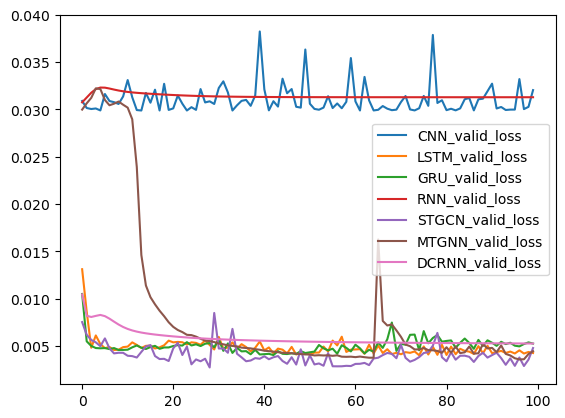

In [1]:
dataset_for_coverage = ['subway_in','netmob_POIs']
dataset_names = ['subway_in']
save_folder = 'benchmark/fold0/'
df_results,df_loss_tot,df_pred_all_models = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

modification = {'epochs' : 100, #100,
                'hp_tuning_on_first_fold': False,
                'keep_best_weights':True

                }

stations_to_plot = ['CHA']
training_mode = 'test'
model_names =['CNN','LSTM','GRU','RNN','STGCN','MTGNN','DCRNN']   # Attention Graph ???
dict_trainers = {}
for model_name in model_names:
    args = local_get_args(model_name,
                            args_init = None,
                            dataset_names=dataset_names,
                            dataset_for_coverage=dataset_for_coverage,
                            modification = modification)
    fold_to_evaluate = [args.K_fold -1]
    trainer,ds,args,trial_id,df_loss = train_the_config(args,modification,fold_to_evaluate)
    trainer,ds_no_shuffle = get_ds_without_shuffling_on_train_set(trainer,modification,args,fold_to_evaluate)


    metrics = trainer.metrics
    df_results = keep_track_on_model_metrics(trainer,df_results,model_name,trainer.performance,trainer.metrics)
    #dict_trainers[model_name] = trainer
    # Get TS prediction on Test Dataset
    df_loss_tot = pd.concat([df_loss_tot,df_loss],axis=1)
    df_pred,df_true,index_df = get_TS_prediction(trainer,ds,stations_to_plot=stations_to_plot,training_mode=training_mode,name= model_name)
    df_pred_all_models = pd.concat([df_pred_all_models,df_pred],axis=1)
    print(df_results)

# Concat with 'Y_true'
df_pred_all_models = pd.concat([df_pred_all_models,df_true],axis=1)
df_pred_all_models.index = index_df
plot_TS(df_pred_all_models,width=1400,height=400,bool_show=True,title='Comparison of Prediction Quality')

df_loss_tot[[f"{model}_valid_loss" for model in model_names]].plot()


In [2]:
df_results

,Model,Valid_loss,Valid_mse,Test_mse,Valid_mae,Test_mae,Valid_mape,Test_mape
0,CNN,0.029883,18683.888672,17581.490234,92.898766,87.686371,284.523895,218.150238
0,LSTM,0.004042,2056.194824,2027.486328,27.648268,27.326344,40.493713,36.615929
0,GRU,0.004063,2078.000488,2051.144531,27.521818,27.205008,45.601322,40.368877
0,RNN,0.030743,19329.923828,18687.574219,90.831963,86.728508,242.366821,185.635788
0,STGCN,0.002752,1368.745239,1421.312134,22.125439,22.203094,38.124065,34.790466
0,MTGNN,0.003603,1870.807617,1942.013184,26.149363,26.374453,46.093781,40.294285
0,DCRNN,0.005282,2824.918213,2873.498779,31.813610,32.829212,57.927681,54.280727


>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 


Invalid dates within this fold: 776

Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
nb subway_in invalid dates:  776
Init U/Utarget size: torch.Size([4702, 40, 7])/torch.Size([4702, 40, 1]) Train/Valid/Test 2821 940 940
Considered Spatial-Unit:  None
Model size: 0.000GB
number of total parameters: 71713
number of trainable parameters: 71713

start training
epoch: 0 
 min\epoch : 1.29
Estimated time for training: 18.8min 

Training Throughput:692.55 sequences per seconds
>>> Training complete in: 0:05:10.429930
>>> Training performance time: min 0.014720678329467773 avg 0.02728891372680664 seconds (+/- 0.06569723933859964)
>>> Loading performance time: min 0.00013709068298339844 avg 0.03701392448955633 seconds (+/- 0.6139421012670077)
>>> Forward performance time: 0.031157050568967972 seconds (+/- 0.06124145142530242)
>>> Backward performance time: 0.007092571333569874 seconds (+/- 0.003103940249793853)
>>> Plotting performance time: 1.2173944590

Loading BokehJS ...

<Axes: >

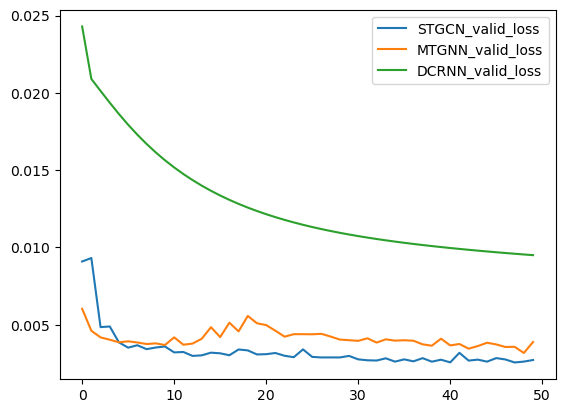

In [2]:
dataset_for_coverage = ['subway_in','netmob_POIs']
dataset_names = ['subway_in']
save_folder = 'benchmark/fold0/'

df_results,df_loss_tot,df_pred_all_models = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
modification = {'epochs' : 50, #100,
                'lr': 0.00135,
                'weight_decay': 0.0733390536333296,
                'batch_size': 32,
                'dropout': 0.3187398629441463,
                'scheduler': None,
                'hp_tuning_on_first_fold': False,
                'keep_best_weights':True
                }

stations_to_plot = ['CHA']
training_mode = 'test'
model_names =['STGCN','MTGNN','DCRNN']   # Attention Graph ???
dict_trainers = {}

for model_name in model_names:
    args = local_get_args(model_name,
                            args_init = None,
                            dataset_names=dataset_names,
                            dataset_for_coverage=dataset_for_coverage,
                            modification = modification)
    fold_to_evaluate = [args.K_fold -1]
    trainer,ds,args,trial_id,df_loss = train_the_config(args,modification,fold_to_evaluate)
    trainer,ds_no_shuffle = get_ds_without_shuffling_on_train_set(trainer,modification,args,fold_to_evaluate)


    metrics = trainer.metrics
    df_results = keep_track_on_model_metrics(trainer,df_results,model_name,trainer.performance,trainer.metrics)
    #dict_trainers[model_name] = trainer
    # Get TS prediction on Test Dataset
    df_loss_tot = pd.concat([df_loss_tot,df_loss],axis=1)
    df_pred,df_true,index_df = get_TS_prediction(trainer,ds,stations_to_plot=stations_to_plot,training_mode=training_mode,name= model_name)
    df_pred_all_models = pd.concat([df_pred_all_models,df_pred],axis=1)
    print(df_results)

# Concat with 'Y_true'
df_pred_all_models = pd.concat([df_pred_all_models,df_true],axis=1)
df_pred_all_models.index = index_df
plot_TS(df_pred_all_models,width=1400,height=400,bool_show=True,title='Comparison of Prediction Quality')

df_loss_tot[[f"{model}_valid_loss" for model in model_names]].plot()

In [7]:
from examples.load_best_config import load_args_of_a_specific_trial
add_name_id = ''
trial_id ='subway_in_STGCN_MSELoss_2025_01_20_14_27_20569'
save_folder = 'K_fold_validation/training_with_HP_tuning/re_validation'
fold_name = 'complete_dataset'
args = load_args_of_a_specific_trial(trial_id,add_name_id,save_folder,fold_name)
args.lr

0.00135

In [10]:
for arg_i in ['lr','weight_decay','batch_size','dropout','scheduler']:
    print(f"'{arg_i}': {getattr(args,arg_i)},")

'lr': 0.00135,
'weight_decay': 0.0733390536333296,
'batch_size': 32,
'dropout': 0.3187398629441463,
'scheduler': nan,
